In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def convert(series):
    number = list()
    for i in series.to_numpy():
        number.append(float(i.replace(",",'.')))
    return np.array(number)

In [109]:
df = pd.read_csv('../../data/33/cw33_2.csv')
df

,I[A] R=3cm,U[V] R=3cm,I[A] R=4cm,U[V] R=4cm,I[A] R=5cm,U[V] R=5cm
0,"1,628","166,24","1,505","235,87","1,525","352,97"
1,"1,527","163,56","1,429","215,79","1,424","320,01"
2,"1,427","158,9","1,323","198,93","1,343","287,46"
3,"1,326","146,57","1,243","176,13","1,28","230,71"
4,"1,226","145,97","1,18","160,08","1,139","213,25"
5,"1,125","143,02","1,14","156,08","1,071",192


In [127]:
df = df.replace(to_replace=r'[,]', value='.', regex=True)
df =df.astype(float)


In [128]:
k = 0.827*10**(-3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   I[A] R=3cm  6 non-null      float64
 1   U[V] R=3cm  6 non-null      float64
 2   I[A] R=4cm  6 non-null      float64
 3   U[V] R=4cm  6 non-null      float64
 4   I[A] R=5cm  6 non-null      float64
 5   U[V] R=5cm  6 non-null      float64
dtypes: float64(6)
memory usage: 416.0 bytes


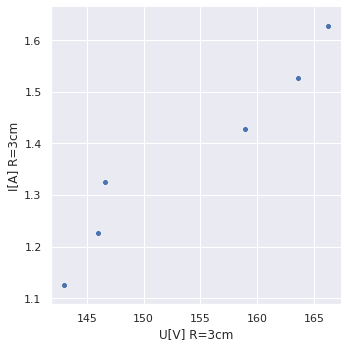

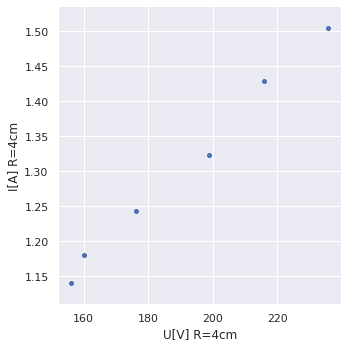

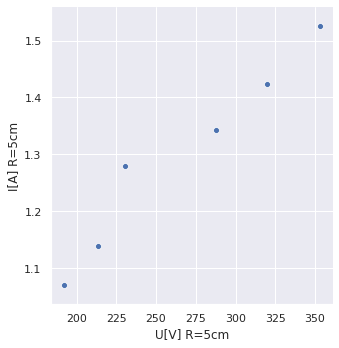

In [130]:
sns.set(style="darkgrid")
sns.relplot(x="U[V] R=3cm", y="I[A] R=3cm", data=df)
sns.relplot(x="U[V] R=4cm", y="I[A] R=4cm", data=df)
sns.relplot(x="U[V] R=5cm", y="I[A] R=5cm", data=df)

In [142]:
y = df['I[A] R=3cm'].to_numpy()
x = df['U[V] R=3cm'].to_numpy()
model1 = np.poly1d(np.polyfit(x, y, 1))

166.24

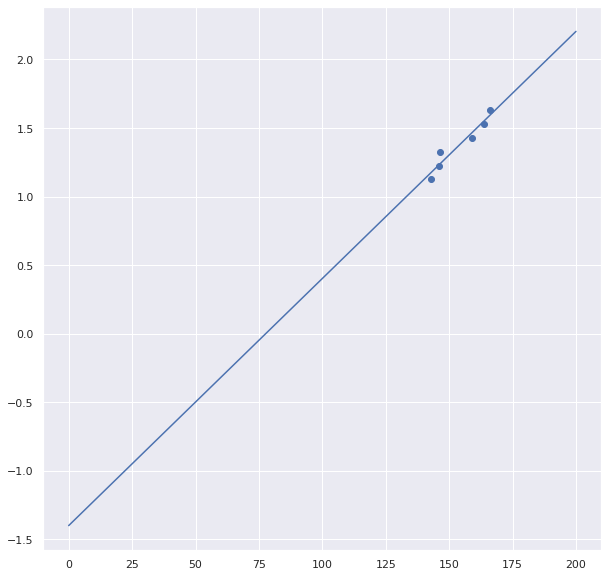

 
0.01802 x - 1.4


In [145]:
line = np.linspace(0, 200, 2)
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(line, model1(line))
plt.show()
print(model1)

In [180]:
def regresion(data_frame):
    models = list()
    for i in range(0,data_frame.columns.size-1,2):
        y = data_frame[data_frame.columns[i]].to_numpy()
        x = data_frame[data_frame.columns[i+1]].to_numpy()
        model = np.poly1d(np.polyfit(x, y, 1))
        line = np.linspace(0, int(x.max()), int(y.max()))
        plt.figure(figsize=(10,10))
        plt.scatter(x,y)
        plt.plot(line, model(line))
        plt.show()
        models.append(model)
    return models

I[A] R=3cm
U[V] R=3cm
I[A] R=4cm
U[V] R=4cm
I[A] R=5cm
U[V] R=5cm


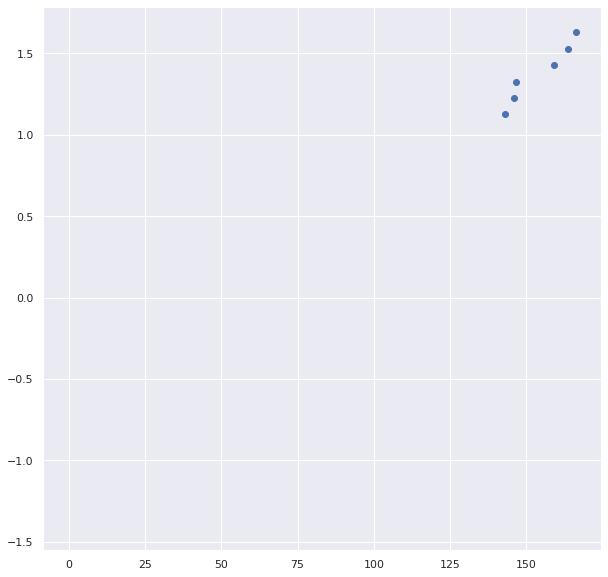

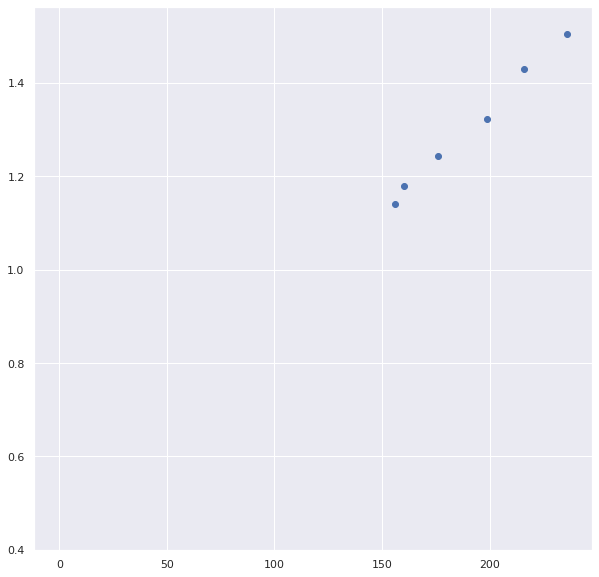

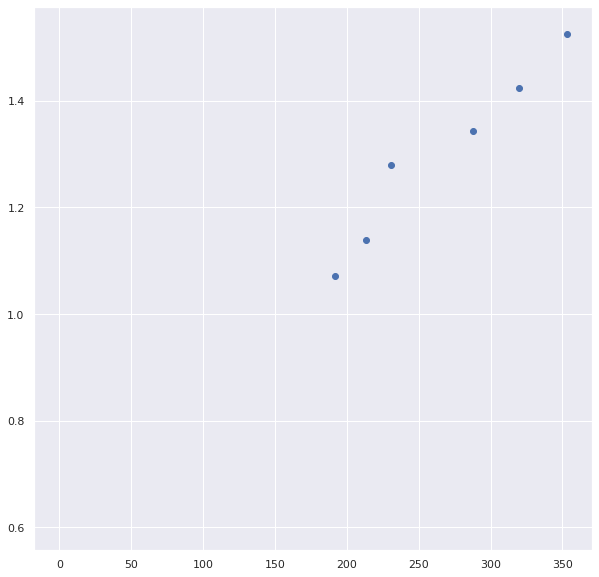

In [181]:
models = regresion(df)

In [179]:
for i in models:
    print(i)




 
0.01802 x - 1.4
 
0.00447 x + 0.4518
 
0.002609 x + 0.6029


In [197]:
r = [3,4,5]
models[0][1]
results = list()
for i in range(0,3):
    result = 2 * models[0][i] / (r[i]**r[i] * k ** k)
    results.append(result)
print(results)
results[2]

[-0.10429998339323608, 0.000141632900194765, 0.0]


0.0